In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from math import floor, ceil, pi
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Some helper functions

In [2]:
def get_images(path):
    data = os.listdir(path)
    return data

In [3]:
def show_one_images(img):
    fig=plt.figure(figsize=(8,8))
    plt.imshow(img)
    plt.show()

In [4]:
def show_two_images(original_image , new_image , cmap=None):
    fig=plt.figure(figsize=(8,8))
    fig.add_subplot(1,2,1)
    plt.imshow(original_image)
    fig.add_subplot(1,2,2)
    plt.imshow(new_image,cmap=cmap)
    plt.show()

### Collect Images

In [5]:
images = get_images('./images/')
print(images)

['sample.jpeg']


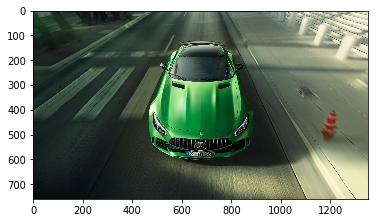

In [6]:
img=mpimg.imread('./images/' + images[0])
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.show()

### 1. Rescale Images

In [6]:
from skimage.transform import rescale
rescaled_image = rescale(img , 0.5 ,mode='constant')

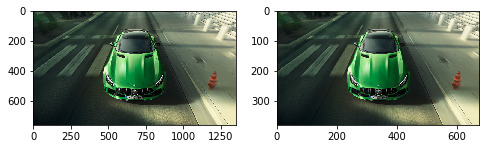

In [7]:
show_two_images(img,rescaled_image)

### 2. Adding random noise

In [8]:
from skimage.util import random_noise
random_noise_image = random_noise(img)

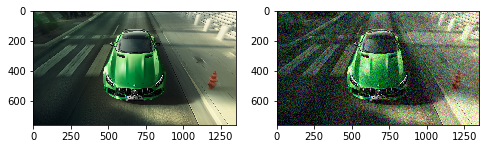

In [9]:
show_two_images(img,random_noise_image)

### 3. Coloured to Grey Scale

In [10]:
from skimage.color import rgb2grey
gray_image = rgb2grey(img)

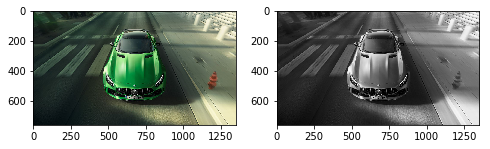

In [11]:
# using cmap allows pyplot show show grey image otherwise it will show image with image intensities
show_two_images(img,gray_image,cmap="gray")

### 4. Image Color Conversion

In [12]:
invert_color_image = np.invert(img)

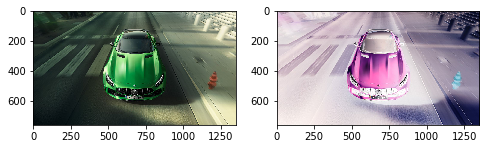

In [13]:
show_two_images(img,invert_color_image)

### 5. Rotate Image

In [7]:
from skimage.transform import rotate

angle1 = 45
angle2 = 75
angle3 = -45
angle4 = -45

rotated_image1 = rotate(img,angle1)
rotated_image2 = rotate(img,angle2)
rotated_image3 = rotate(img,angle3)
rotated_image4 = rotate(img,angle4)

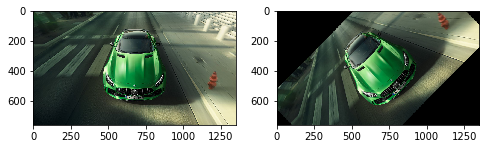

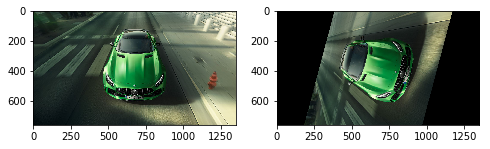

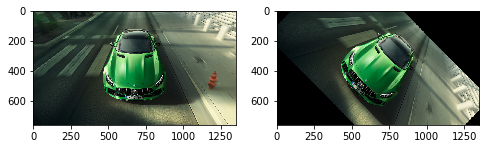

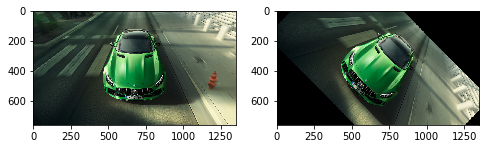

In [8]:
show_two_images(img,rotated_image1)
show_two_images(img,rotated_image2)
show_two_images(img,rotated_image3)
show_two_images(img,rotated_image4)

### 6. Rescale intensity

In [16]:
from skimage import exposure
v_min , v_max = np.percentile(img , (0.2,70.8))
contrast_image = exposure.rescale_intensity(img , in_range=(v_min , v_max))

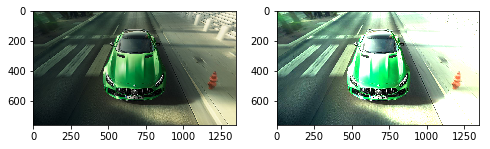

In [17]:
show_two_images(img,contrast_image)

### 7. Gamma Correction

In [18]:
gamma_image = exposure.adjust_gamma(img , gamma=0.4 , gain=0.8)

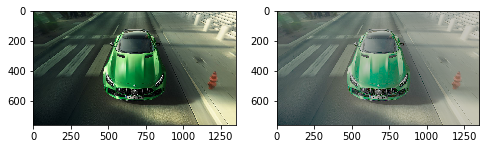

In [19]:
show_two_images(img,gamma_image)

### 8. Horizontal Flip

In [20]:
hor_flip_image = img[: , ::-1]

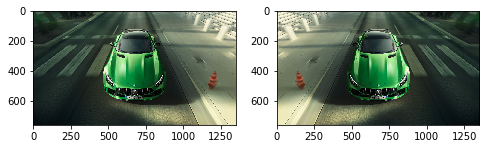

In [21]:
show_two_images(img,hor_flip_image)

### 9. Vertical Flip

In [22]:
vert_flip_image = img[::-1 , :]

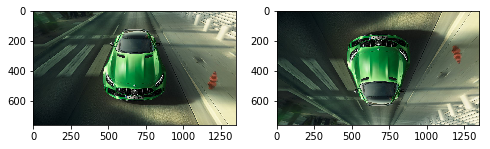

In [23]:
show_two_images(img,vert_flip_image)

### 10. Red Blur

In [24]:
red_blur_image = img[:,:,0]

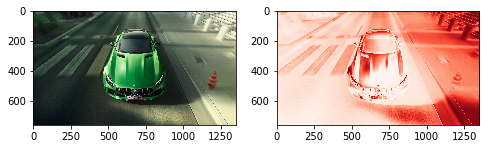

In [25]:
show_two_images(img,red_blur_image,cmap='Reds')

### 11. Green Blur

In [26]:
green_blur_image = img[:,:,1]

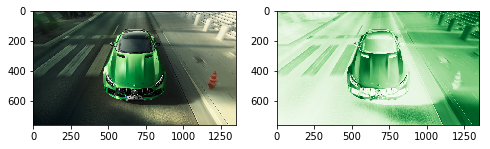

In [27]:
show_two_images(img,green_blur_image,cmap='Greens')

### 12. Blue Blur

In [28]:
blue_image_blur = img[:,:,2]

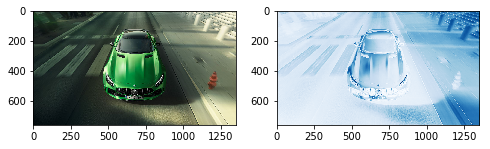

In [29]:
show_two_images(img,blue_image_blur,cmap='Blues')

### 13. Sunny Weather

In [25]:
def add_sunny_weather(image):
    image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) 
    image_HLS = np.array(image_HLS, dtype = np.float64) 
    random_brightness_coefficient = np.random.uniform()+0.5
    image_HLS[:,:,1] = image_HLS[:,:,1]*random_brightness_coefficient 
    image_HLS[:,:,1][image_HLS[:,:,1]>255]  = 255
    image_HLS = np.array(image_HLS, dtype = np.uint8)
    image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) 
    return image_RGB

In [26]:
bright_image = add_sunny_weather(img)

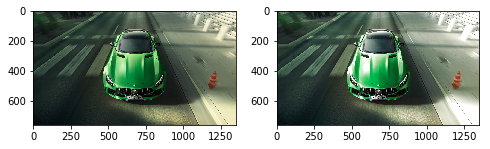

In [27]:
show_two_images(img,bright_image)

### 14. Shady Weather

In [31]:
def add_shady_weather(image):
    image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) 
    image_HLS = np.array(image_HLS, dtype = np.float64) 
    random_brightness_coefficient = np.random.uniform()+0.3
    image_HLS[:,:,1] = image_HLS[:,:,1]*random_brightness_coefficient 
    image_HLS[:,:,1][image_HLS[:,:,1]>255]  = 255
    image_HLS = np.array(image_HLS, dtype = np.uint8)
    image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) 
    return image_RGB

In [32]:
shady_image = add_shady_weather(img)

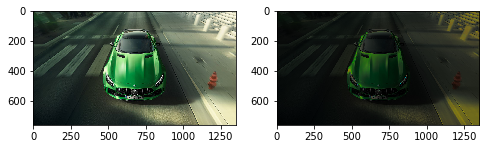

In [33]:
show_two_images(img,shady_image)

### 15. Snowy Weather With Sunny Conditions

In [162]:
def add_snow_sunny_weather(image):
    image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) 
    image_HLS = np.array(image_HLS, dtype = np.float64) 
    brightness_coefficient = 2.5 
    snow_point=140 ## increase this for more snow
    image_HLS[:,:,1][image_HLS[:,:,1]<snow_point] = image_HLS[:,:,1][image_HLS[:,:,1]<snow_point]*brightness_coefficient
    image_HLS[:,:,1][image_HLS[:,:,1]>255]  = 255 
    image_HLS = np.array(image_HLS, dtype = np.uint8)
    image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) 
    return image_RGB

In [163]:
snow_image = add_snow_sunny_weather(img)

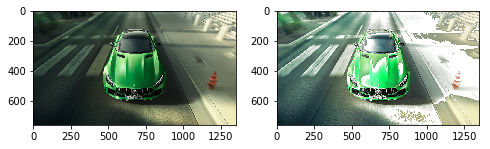

In [164]:
show_two_images(img,snow_image)

### 16. Snowy Weather With Shady Conditions

In [62]:
def add_snow_shady_weather(image):
    image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) 
    image_HLS = np.array(image_HLS, dtype = np.float64) 
    brightness_coefficient = 0.5
    snow_point=140 ## increase this for more snow
    image_HLS[:,:,1][image_HLS[:,:,1]<snow_point] = image_HLS[:,:,1][image_HLS[:,:,1]<snow_point]*brightness_coefficient
    image_HLS[:,:,1][image_HLS[:,:,1]>255]  = 255 
    image_HLS = np.array(image_HLS, dtype = np.uint8)
    image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) 
    return image_RGB

In [63]:
snow_image = add_snow_shady_weather(img)

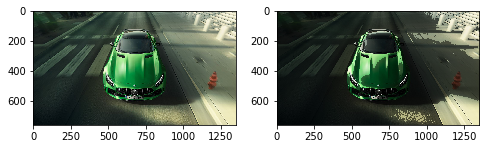

In [64]:
show_two_images(img,snow_image)

### 17. Rain Weather

In [122]:
def add_water_drops(imshape,slant,drop_length):
    drops=[]
    for i in range(1500): 
        if slant<0:
            x= np.random.randint(slant,imshape[1])
        else:
            x= np.random.randint(0,imshape[1]-slant)
        y= np.random.randint(0,imshape[0]-drop_length)
        drops.append((x,y))
    return drops

In [123]:
def add_rain(image):
    
    imshape = image.shape
    slant_extreme=10
    slant= np.random.randint(-slant_extreme,slant_extreme) 
    drop_length=20
    drop_width=2
    drop_color=(200,200,200) 
    rain_drops= add_water_drops(imshape,slant,drop_length)
    
    for rain_drop in rain_drops:
        cv2.line(image,(rain_drop[0],rain_drop[1]),(rain_drop[0]+slant,rain_drop[1]+drop_length),drop_color,drop_width)
    image= cv2.blur(image,(7,7))
    
    brightness_coefficient = 0.7 
    image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) 
    image_HLS[:,:,1] = image_HLS[:,:,1]*brightness_coefficient 
    image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) 
    return image_RGB

In [128]:
rain_image = add_rain(img)

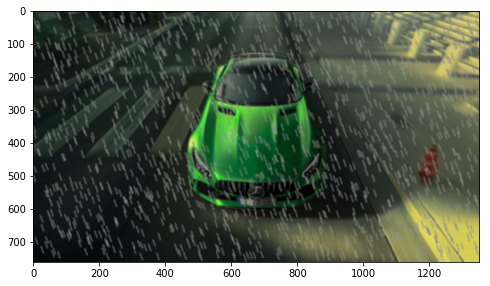

In [129]:
show_one_images(rain_image)

### Saving The Image

In [9]:
from scipy.misc import imsave

In [158]:
imsave('./Generated_Images/rescale.png' , rescaled_image)

In [159]:
imsave('./Generated_Images/contrast.png' , contrast_image)

In [160]:
imsave('./Generated_Images/rain.png' , rain_image)

In [165]:
imsave('./Generated_Images/snow.png' , snow_image)

In [10]:
imsave('./Generated_Images/flipped.png' , rotated_image3)